# Visualisation 2 (Week 4) – Recovered code + Graph


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
#Read in from Raw url , updates everyday.
recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
#Create a dataframe with confirmed cases and turns the date columsn into date objects instead of strings
df = pd.read_csv(recovered, parse_dates=True)
#Drop the province/state column as it is redundent for our objective
df.drop(columns=['Province/State','Lat','Long'], inplace = True )
#Melt function to narrow our dataframe and make Date it's own columm / index
df = df.melt(['Country/Region'],df.drop('Country/Region', axis=1),'Date', 'Recovered', 0)

#setting country and date as our index for later iterations and data manipulation
df = df.set_index(['Country/Region', 'Date'])
#Group by country / date to see each country in order with every date + add confirmed cases column
df = df.groupby(['Country/Region', 'Date'])['Recovered'].sum()
df = pd.DataFrame(df)
#Reset index so we can access Date adn change all the dates to datetime objects.
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
#Reset index to allow for sorting in alphabetical order 
df = df.set_index(['Country/Region', 'Date'])
df = df.sort_values(['Country/Region', 'Date'], ascending = True)
df

Recovered
Country/Region Date                 
Afghanistan    2020-01-22          0
               2020-01-23          0
               2020-01-24          0
               2020-01-25          0
               2020-01-26          0
...                              ...
Zimbabwe       2020-06-26        135
               2020-06-27        142
               2020-06-28        142
               2020-06-29        152
               2020-06-30        162

[30268 rows x 1 columns]

In [3]:
df['Daily'] = df['Recovered'].diff().fillna(0)
df

Recovered  Daily
Country/Region Date                        
Afghanistan    2020-01-22          0    0.0
               2020-01-23          0    0.0
               2020-01-24          0    0.0
               2020-01-25          0    0.0
               2020-01-26          0    0.0
...                              ...    ...
Zimbabwe       2020-06-26        135    7.0
               2020-06-27        142    7.0
               2020-06-28        142    0.0
               2020-06-29        152   10.0
               2020-06-30        162   10.0

[30268 rows x 2 columns]

In [4]:
df['True/False'] = df['Daily'].apply(lambda x: x >= 0)
df = df.loc[df['True/False'], :]
df = df.drop('True/False', axis=1)
df

Recovered  Daily
Country/Region Date                        
Afghanistan    2020-01-22          0    0.0
               2020-01-23          0    0.0
               2020-01-24          0    0.0
               2020-01-25          0    0.0
               2020-01-26          0    0.0
...                              ...    ...
Zimbabwe       2020-06-26        135    7.0
               2020-06-27        142    7.0
               2020-06-28        142    0.0
               2020-06-29        152   10.0
               2020-06-30        162   10.0

[30023 rows x 2 columns]

In [5]:
countries = set()
for row in df.iterrows():
    countries.add(row[0][0])
    
countries 

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [6]:
df = df.reset_index()
df

,Country/Region,Date,Recovered,Daily
0,Afghanistan,2020-01-22,0,0.0
1,Afghanistan,2020-01-23,0,0.0
2,Afghanistan,2020-01-24,0,0.0
3,Afghanistan,2020-01-25,0,0.0
4,Afghanistan,2020-01-26,0,0.0
...,...,...,...,...
30018,Zimbabwe,2020-06-26,135,7.0
30019,Zimbabwe,2020-06-27,142,7.0
30020,Zimbabwe,2020-06-28,142,0.0
30021,Zimbabwe,2020-06-29,152,10.0


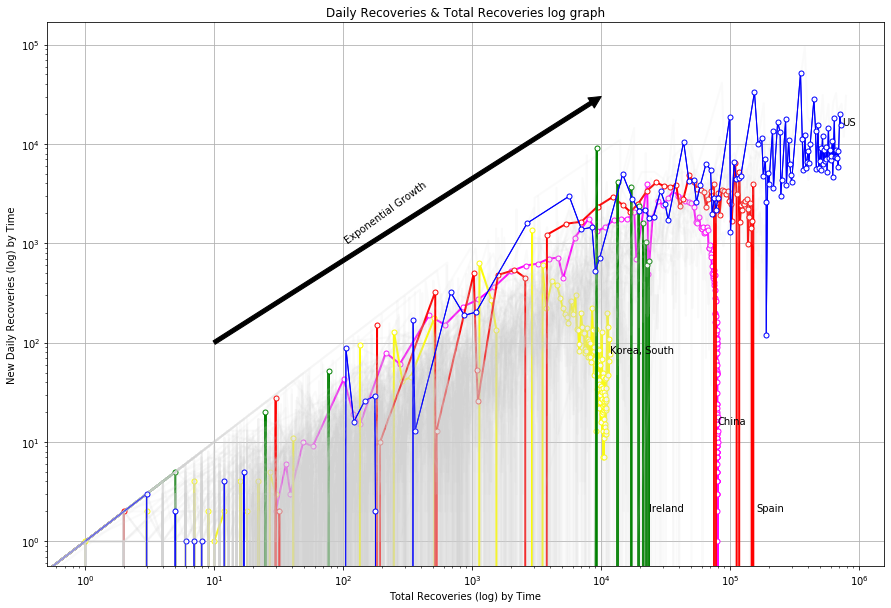

In [8]:
fig = plt.figure(figsize=(15,10))

for country in countries:
    country_df = df[df['Country/Region'] == country ]
    daily_list = country_df['Daily'].tolist()
    total_list = country_df['Recovered'].tolist()
    x = total_list
    y = daily_list
    
    plt.plot(x, y, label = country, color = 'lightgrey', linewidth=2, alpha=0.1)
    
    if country == 'US':
        plt.plot(x, y, label = country, color='blue', linewidth=1)
        plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='blue', linewidth=1)
        plt.annotate(country , xy=(total_list[-1] + 10000, daily_list[-1] + 2), color='Black')
                     
    if country == 'Ireland':
        plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='Green', linewidth=2)
        plt.annotate(country , xy=(total_list[-1] + 100, daily_list[-1] + 2), color='Black')
        
    if country == 'Spain':
        plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='red', linewidth=2)
        plt.annotate(country , xy=(total_list[-1] + 10000, daily_list[-1] + 2), color='Black')

    if country == 'China':
        plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='magenta', linewidth=2)
        plt.annotate(country , xy=(total_list[-1] + 500, daily_list[-1] + 2), color='Black')
        
    if country == 'Korea, South':
        plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='Yellow', linewidth=2)
        plt.annotate(country , xy=(total_list[-1] + 2, daily_list[-1] + 2), color='Black')
    
plt.title("Daily Recoveries & Total Recoveries log graph")
plt.xlabel("Total Recoveries (log) by Time")
plt.ylabel("New Daily Recoveries (log) by Time")
plt.yscale('log')
plt.xscale('log')
plt.annotate('', xy=(10000,30000), xytext=(10,100), arrowprops=dict(facecolor='k',shrink=100),
            horizontalalignment='right', verticalalignment='bottom')
plt.annotate('Exponential Growth', xy=(10000,15000), xytext=(100,1000), rotation = 36)
plt.grid(True)
plt.show()

In [14]:
country_df = df[df['Country/Region'] == 'Spain' ]
country_df.head(85)

,Country/Region,Date,Recovered,Daily
25236,Spain,2020-01-23,0,0.0
25237,Spain,2020-01-24,0,0.0
25238,Spain,2020-01-25,0,0.0
25239,Spain,2020-01-26,0,0.0
25240,Spain,2020-01-27,0,0.0
...,...,...,...,...
25316,Spain,2020-04-12,62391,3282.0
25317,Spain,2020-04-13,64727,2336.0
25318,Spain,2020-04-14,67504,2777.0
25319,Spain,2020-04-15,70853,3349.0
